# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Ankita Kundra

EID: ak44675

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:



### a) 

Bias is the difference between the estimated prediction of our model and the correct value which we are trying to predict. Since $E[g(x_0)]$ represents the estimated value of the prediction of our model while $f(x_0)$ represents the correct value which we are trying to predict, thus this equation represents the bias of the estimator. 



### b)

Bias is the difference between the estimated prediction of our model and the correct value which we are trying to predict while Variance determines how senstive the model is to variations in data. Model with high bias pays very little attention to the training data and oversimplifies the model, hence leading to high error on training as well as test data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before, leading to high error rates on test data. If our model is too simple, it may have high bias and low variance. On the other hand if our model is too complex, it’s going to have high variance and low bias. 

So we need to find the right balance without overfitting and underfitting the data. This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time.  

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


### a)

In [333]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%pylab inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

Populating the interactive namespace from numpy and matplotlib


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


For Quadratic Model(Degree 2): MSE on Train Data is  247.29679797371534 and MSE on Test Data is  320.0640834697786
For Quartic Model(Degree 4): MSE on Train Data is  31.72001805729004 MSE on Test Data is  31.292082886606718
For Septic Model(Degree 7): MSE on Train Data is  30.677193592109738 MSE on Test Data is  33.410694077690145


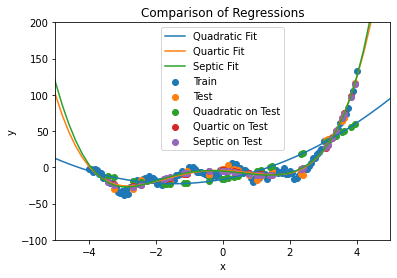

In [334]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
    #x_all = np.linspace(-4,4,101).reshape(-1,1)
    
    x_train_2 = np.vander(np.squeeze(x_train), 3)
    x_train_4 = np.vander(np.squeeze(x_train), 5)
    x_train_7 = np.vander(np.squeeze(x_train), 8)
    
    x_test_2 = np.vander(np.squeeze(x_test), 3)
    x_test_4 = np.vander(np.squeeze(x_test), 5)
    x_test_7 = np.vander(np.squeeze(x_test), 8)
    
    lrp_2 = LinearRegression()
    model_2 = lrp_2.fit(x_train_2, y_train)
    
    lrp_4 = LinearRegression()
    model_4 = lrp_4.fit(x_train_4, y_train)
    
    lrp_7 = LinearRegression()
    model_7 = lrp_7.fit(x_train_7, y_train)

    mse_train_2 = mean_squared_error(y_train, model_2.predict(x_train_2))
    mse_train_4 = mean_squared_error(y_train, model_4.predict(x_train_4))
    mse_train_7 = mean_squared_error(y_train, model_7.predict(x_train_7))
    
    mse_test_2 = mean_squared_error(y_test, model_2.predict(x_test_2))
    mse_test_4 = mean_squared_error(y_test, model_4.predict(x_test_4))
    mse_test_7 = mean_squared_error(y_test, model_7.predict(x_test_7))
    
    
    y_all_predict_2 = model_2.predict(np.vander(np.squeeze(x_all), 3))
    y_all_predict_4 = model_4.predict(np.vander(np.squeeze(x_all), 5))
    y_all_predict_7 = model_7.predict(np.vander(np.squeeze(x_all), 8))
    
    scatter(x_train,y_train, label = 'Train')
    scatter(x_test,y_test, label = 'Test')

    plot(x_all,y_all_predict_2, label = 'Quadratic Fit')
    plot(x_all,y_all_predict_4, label = 'Quartic Fit')
    plot(x_all,y_all_predict_7, label = 'Septic Fit')
    
    scatter(x_test, model_2.predict(x_test_2), label = 'Quadratic on Test')
    scatter(x_test, model_4.predict(x_test_4), label = 'Quartic on Test')
    scatter(x_test, model_7.predict(x_test_7), label = 'Septic on Test')


    #Label the graph
    legend(loc='best')
    xlabel("x")
    ylabel("y")
    title("Comparison of Regressions")
    xlim([-5,5])
    ylim([-100,200])
  # YOUR CODE COMES HERE
    #print("IMPLEMENT ME!")
    #return [0, 0, 0], [0, 0, 0]
    return [mse_train_2, mse_train_4, mse_train_7], [mse_test_2, mse_test_4, mse_test_7]
    #return y_all_predict_2, y_all_predict_4, y_all_predict_7 

mse_train, mse_test = plot_curves(x_train, y_train, x_test, y_test)


print('For Quadratic Model(Degree 2): MSE on Train Data is ',mse_train[0], "and MSE on Test Data is ",mse_test[0])
print('For Quartic Model(Degree 4): MSE on Train Data is ',mse_train[1], "MSE on Test Data is ",mse_test[1])
print('For Septic Model(Degree 7): MSE on Train Data is ',mse_train[2], "MSE on Test Data is ",mse_test[2])


### b)

In terms of lowest test mean square errors, the quartic model (Degree 4) performed the best. It generally performed well as it is relatively unbiased towards the data and avoids overfitting unlike the 7th degree polynomial. Thus, it mantains the perfect balance between bias and variance. The 7th degree polynomial performed well on the training data but overfitting caused a higher test mean square error. Thus, it has low bias but higher variance. The quadratic model is biased and not a good approximation of the true relationship of the points. It gives high error on both test and training dataset. It has high bias but low variance

### c)

100% data


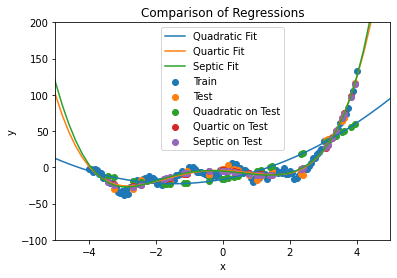

In [335]:
# Fit the different polynomials to the training data and make the plots 

print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

20% data


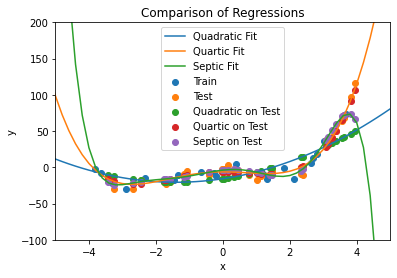

In [336]:
# Study the effects of the training data size on the bias and variance

print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)

40% data


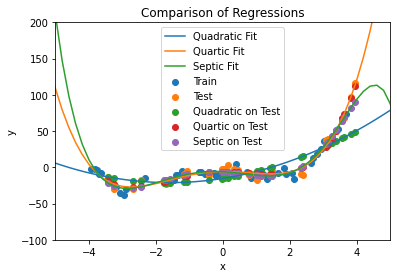

In [337]:
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)

60% data


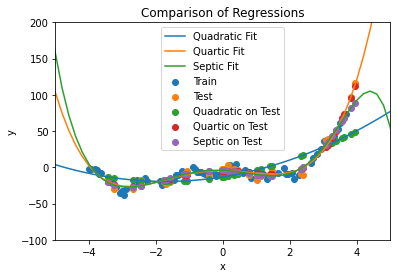

In [338]:
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)

80% data


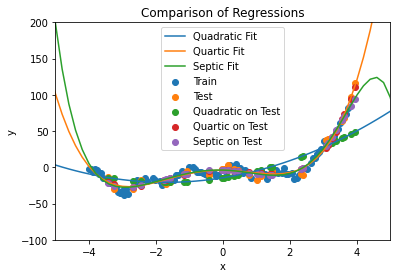

In [339]:
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)

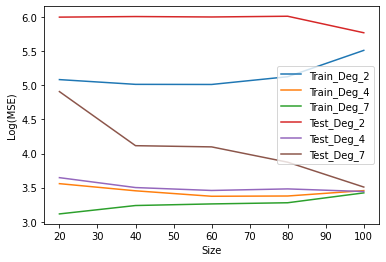

In [340]:

array_train = (np.log(train_rmses_20),np.log(train_rmses_40), np.log(train_rmses_60),np.log(train_rmses_80), np.log(train_rmses_100))
array_test = (np.log(test_rmses_20),np.log(test_rmses_40), np.log(test_rmses_60),np.log(test_rmses_80), np.log(test_rmses_100))


train_mse = pd.DataFrame(array_train, columns = ['Train_Deg_2', 'Train_Deg_4', 'Train_Deg_7'])
train_mse['Size'] = [20, 40, 60, 80, 100]

test_mse = pd.DataFrame(array_test, columns = ['Test_Deg_2', 'Test_Deg_4', 'Test_Deg_7'])
test_mse['Size'] = [20, 40, 60, 80, 100]

train_test = pd.merge(train_mse,test_mse, on = 'Size')
train_test.set_index('Size', inplace = True)


train_test.plot(ylabel = 'Log(MSE)')
legend(loc='best')

## Answer:

**General Trend:**

As the size of the training data increases, the MSE on the training data seems to increase for all the models. But the MSE values on the test data reduces.

**Reason:**

Increase in training data size helps in avoiding overfitting of the data and reducing variance. Thus, even if MSE in the same dataset is increased, MSE on an unseen data will be reduced


**Specific Trends:**

For Quadratic Model, the MSE values for both test and training data are higher than other two models. This is because it largely underfits the data by simplifying the model. We see that as the size of the training data increases, the error on training data almost remains constant till a certain size before increasing after a given size. For test data, we see the opposite trend where the error remains constant till a certain point before reducing. This is because as the size of the data incraeses, the variance of the model reduces.


For Quartic Model, we get the least error in test data set. This is because out of the three model, this seems to mantain the best balance between bias and variance. For this model, the error on both training and test data slightly reduces with increase in size but largely remains constant. This indicates that MSE cannot be reduced further for this model and variance is not a problem with this model.


Septic Model gives the least error in training data indicating it has low bias. As the size of the data increases, the MSE on train data increases slightly but it reduces substantially in test data. This is because as the training data size increases, we get an optimal value of MSE at a greater complexity. 

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

### a) 

Gradient descent may take more computational time especially when the size of training dataset is huge because in every iteration when the values of the parameters are being updated, it is being run through the complete training set. On the other hand, using Stochastic Gradient Descent will be faster because you use only one training sample and it starts improving itself right away from the first sample. Stochastic Gradient Descent is also less prone to local minima and hence often applied to complex models. The disadvantage of Stochastc Gradient Descent over Gradient Descent is that the error function is not minimized as well as in the case of Gradient Descent. 


### b) 

Nelder-Mead method is used to find the minimum value of a function. It dynamically adjusts the step size based on the loss of the new point. If the new point is better than any previously seen value, it expands the step size to accelerate towards the bottom. Likewise if the new point is worse it contracts the step size to converge around the minima. Thus, it takes lesser computational time than Gradient Descent.

The biggest downside to this method is that it starts to perform badly with higher dimensional functions. For 1 and 2 dimensional examples, Nelder-Mead performs well but this method won't work on even simple problems with more than a dozen or so parameters. One of the problems is in figuring out the direction to go: this isn't too hard in a 2-dimensional space, but gets exponentially more difficult as the number of dimensions grow.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$


Let L be the loss function i.e the sum of square errors (SSE) between the predicted output and actual output.

$$ \begin{eqnarray*} SSE = L &=& \sum_{i=1}^n (y_i-\hat{y}i)^2 \end{eqnarray*} $$ 

$$ \begin{eqnarray*} L &=& \sum_{i=1}^n (y_i - \hat{w}_0 - \hat{w}_1x_1 - \hat{w}_2x_1x_2 - \hat{w}_3e^{-x_1})^2 \end{eqnarray*} $$

$$ \begin{eqnarray*} \frac{\partial}{\partial{\hat{w}0}} (L) &=& - 2 \sum_{i=1}^n (y_i - \hat{w}_0 - \hat{w}_1x_1 - \hat{w}_2x_1x_2 - \hat{w}_3e^{-x_1}) \end{eqnarray*} $$

$$ \begin{eqnarray*} &=& \sum_{i=1}^n 2*(\hat{y}-y)  \end{eqnarray*} $$


$$ \begin{eqnarray*} \frac{\partial}{\partial{\hat{w}1}} (L) &=& -2 \sum_{i=1}^n x_1(y_i - \hat{w}_0 - \hat{w}1x_1 - \hat{w}2x_1x_2 - \hat{w}_3e^{-x_1}) \end{eqnarray*} $$ 

$$ \begin{eqnarray*} &=& \sum_{i=1}^n 2*(\hat{y}-y)x_1  \end{eqnarray*} $$


$$ \begin{eqnarray*} \frac{\partial}{\partial{\hat{w}2}} (L) &=& -2 \sum_{i=1}^n x_1x_2(y_i - \hat{w}_0 - \hat{w}1x_1 - \hat{w}_2x_1x_2 - \hat{w}_3e^{-x_1}) \end{eqnarray*} $$ 

$$ \begin{eqnarray*} &=& \sum_{i=1}^n 2*(\hat{y}-y)x_1x_2  \end{eqnarray*} $$

$$ \begin{eqnarray*} \frac{\partial}{\partial{\hat{w}_3}} (L) &=& -2 \sum_{i=1}^n e^{-x_1}(y_i - \hat{w}_0 - \hat{w}_1x_1 - \hat{w}_2x_1x_2 - \hat{w}_3e^{-x_1}) \end{eqnarray*} $$ 

$$ \begin{eqnarray*} &=& \sum_{i=1}^n 2*(\hat{y}-y)e^{-x_1}  \end{eqnarray*} $$

These partial derivatives will help in determining the updated coefficients. Let $w^*$ stand for the new weight and $w$ for the old weight. Let $\eta$ be the learning rate. Then, the four updated weights are then:

$$ \begin{eqnarray*} \ w_0^* &=& w_0 - \eta[ \sum_{i=1}^n 2*(\hat{y}-y)] \end{eqnarray*} $$

$$ \begin{eqnarray*} \ w_1^* &=& w_1 - \eta [\sum_{i=1}^n 2*(\hat{y}-y)x_1]  \end{eqnarray*} $$ 

$$ \begin{eqnarray*} \ w_2^* &=& w_2 - \eta [\sum_{i=1}^n 2*(\hat{y}-y)x_1x_2] \end{eqnarray*} $$ 

$$ \begin{eqnarray*} \ w_3^* &=& w_3 - \eta [\sum_{i=1}^n 2*(\hat{y}-y)e^{-x_1}] \end{eqnarray*} $$

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [341]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

## Answer:

### a)

In [342]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate*gradient) # = please put your codes here to update the self.coef using SGD
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                
                X_i = X[i,:]
                error_i = self.linearPredict(X_i) - y[i]
                
                gradient = (error_i*X_i) + (self.regularization)*(self.coef)
                
                # Compute error
                   #please put your codes here

                # Compute gradients
                    #please put your codes here
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return X.dot(self.coef) #this line is just a placeholder, please delete this line in your code        

In [343]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in multiply
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


Combinations are displayed in the following format: (learning rate, regularization).
The first best combination is (0.01, 0)
The second best combination is (0.001, 0)
Their MSE scores are [0.027391087575201013, 0.03049599152007353]


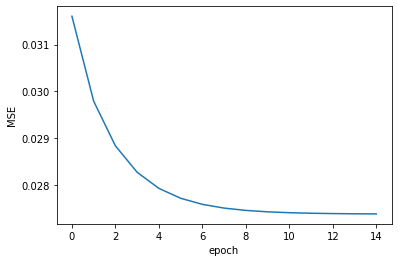

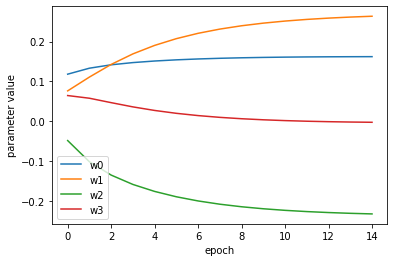

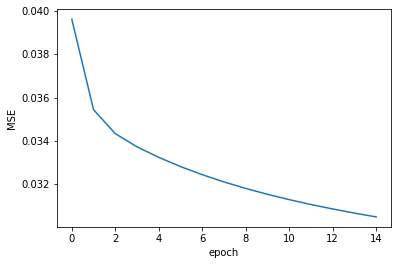

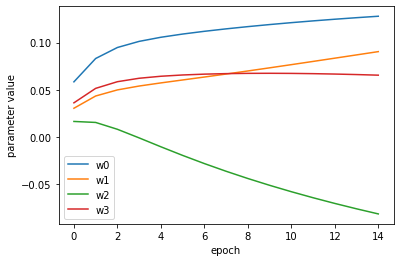

In [344]:
#Make a list of arrays for the learning rates and the regularization rates
combo_list = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        combo_list.append((learning_rate[lr], regularization[reg]))
#Make an empty list for the lowest mse scores.
lowest_mse_scores = []

#Iterate over the list of arrays to find lowest mse.
for i in range(0, len(combo_list)):
    sgd = Regression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,plot=False)
    lowest_mse_scores.append(sgd.lowest_mse)

#Show the best combo
#Rounded to 4 decimal places
chosen_combo_list = np.argsort(np.array(lowest_mse_scores))[:2]
print("Combinations are displayed in the following format: (learning rate, regularization).")
print('The first best combination is', combo_list[chosen_combo_list[0]])
print('The second best combination is', combo_list[chosen_combo_list[1]])
lowest_mse_scores = []
#Iterate over the duo to put in the parameters to get the lowest mse score for each of them.
for i in chosen_combo_list:
    sgd = Regression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,plot=True)
    lowest_mse_scores.append(sgd.lowest_mse)
print('Their MSE scores are', lowest_mse_scores)

### (b)

In [345]:
print("Combinations are displayed in the following format: (learning rate, regularization).")
print('The first best combination is', combo_list[chosen_combo_list[0]])
print('The second best combination is', combo_list[chosen_combo_list[1]])
print('Their MSE scores are', lowest_mse_scores)

Combinations are displayed in the following format: (learning rate, regularization).
The first best combination is (0.01, 0)
The second best combination is (0.001, 0)
Their MSE scores are [0.027391087575201013, 0.03049599152007353]
